# Predicting Credit Score from your car
- Our simple dataset contains a few attributes for each car such as
- Owner(Driver), Sex, Credit_Score, age
# Aim
- to use this info to predict credits for new owner

In [6]:
# Import basic necessities
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [7]:
drivers_df = pd.read_csv("ready_db/drviers.csv")
drivers_df.head()

,DRIVER_ID,GENDER,CREDIT_SCORE,AGE,VEHICLE_ID
0,1,2.0,824,27.0,7420963
1,2,1.0,824,28.0,7420963
2,3,2.0,666,51.0,7396448
3,4,2.0,666,34.0,6208988
4,5,2.0,824,88.0,6078430


In [8]:
drivers_df.describe()

,DRIVER_ID,GENDER,CREDIT_SCORE,AGE,VEHICLE_ID
count,736.000000,726.000000,736.000000,730.000000,7.360000e+02
mean,368.500000,1.519284,739.355978,43.676712,6.479365e+06
std,212.609188,0.499972,102.256133,15.576956,1.316927e+06
min,1.000000,1.000000,321.000000,15.000000,9.999600e+04
25%,184.750000,1.000000,666.000000,33.000000,6.173074e+06
50%,368.500000,2.000000,750.000000,43.000000,6.621470e+06
75%,552.250000,2.000000,824.000000,54.000000,7.193163e+06
max,736.000000,2.000000,875.000000,97.000000,7.506212e+06


In [9]:
# Check all odd that might exists
drivers_df = drivers_df.dropna()
print ("Rows     : " , drivers_df.shape[0])
print ("Columns  : " , drivers_df.shape[1])
print ("\nFeatures : \n" , drivers_df.columns.tolist())
print ("\nMissing values :  ", drivers_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",drivers_df.nunique())

Rows     :  726
Columns  :  5

Features : 
 ['DRIVER_ID', 'GENDER', 'CREDIT_SCORE', 'AGE', 'VEHICLE_ID']

Missing values :   0

Unique values :  
 DRIVER_ID       726
GENDER            2
CREDIT_SCORE     39
AGE              65
VEHICLE_ID      277
dtype: int64


In [10]:
# Let's check corr- high values? The realtionship with vehicle and credit score is high
drivers_df.corr()

,DRIVER_ID,GENDER,CREDIT_SCORE,AGE,VEHICLE_ID
DRIVER_ID,1.000000,-0.021521,-0.006066,0.022198,-0.143907
GENDER,-0.021521,1.000000,0.043163,-0.059992,0.086212
CREDIT_SCORE,-0.006066,0.043163,1.000000,-0.070935,0.403140
AGE,0.022198,-0.059992,-0.070935,1.000000,0.004310
VEHICLE_ID,-0.143907,0.086212,0.403140,0.004310,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


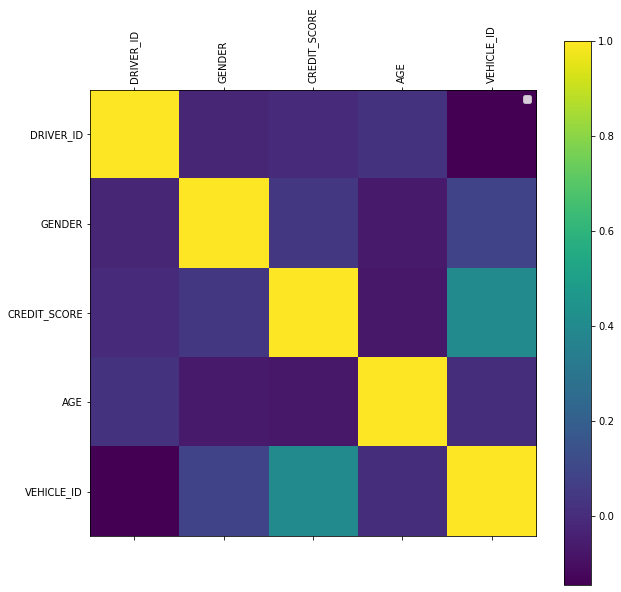

In [11]:
# Let's plot corr- high values? The realtionship with vehicle and credit score is high
import matplotlib.pyplot as plt
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(drivers_df)    

<AxesSubplot:ylabel='Frequency'>

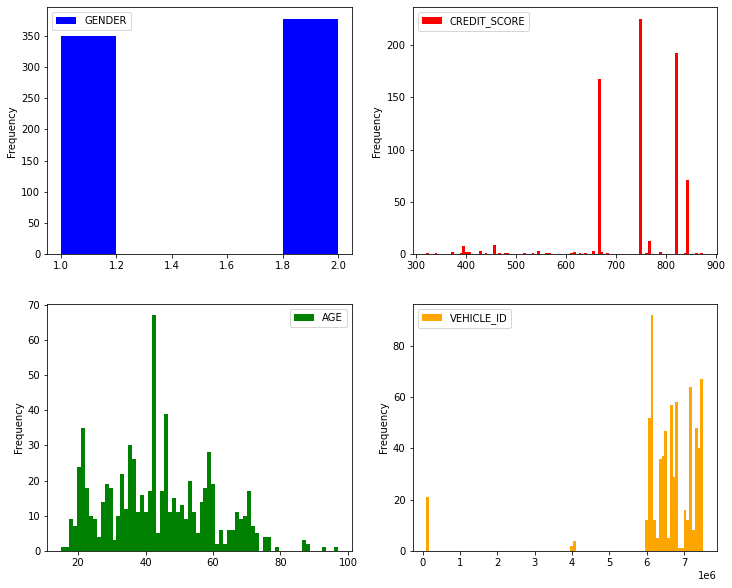

In [12]:
# let's take an individual categories how it is distributed
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
drivers_df.plot(kind='hist', y='GENDER', bins=5, color='b', ax=axes[0][0])
drivers_df.plot(kind='hist', y='CREDIT_SCORE', bins=100, color='r', ax=axes[0][1])
drivers_df.plot(kind='hist', y='AGE', bins=70, color='g', ax=axes[1][0])
drivers_df.plot(kind='hist', y='VEHICLE_ID', bins=100, color='orange', ax=axes[1][1])

<AxesSubplot:title={'center':'VEHICLE ID vs. CREDIT SCORE'}, xlabel='VEHICLE_ID', ylabel='CREDIT_SCORE'>

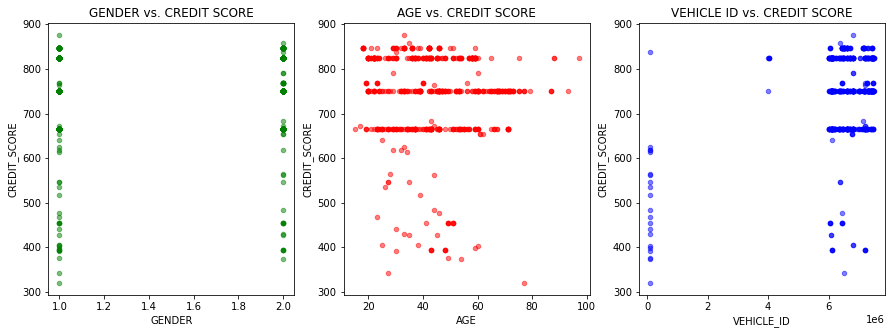

In [13]:
#How about scatter related to Credit Score?
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
drivers_df.plot(kind='scatter', x='GENDER', y='CREDIT_SCORE', alpha=0.5, color='green', ax=axes[0], title="GENDER vs. CREDIT SCORE")
drivers_df.plot(kind='scatter', x='AGE', y='CREDIT_SCORE', alpha=0.5, color='red', ax=axes[1], title="AGE vs. CREDIT SCORE")
drivers_df.plot(kind='scatter', x='VEHICLE_ID', y='CREDIT_SCORE', alpha=0.5, color='blue', ax=axes[2], title="VEHICLE ID vs. CREDIT SCORE")

<AxesSubplot:xlabel='CREDIT_SCORE', ylabel='AGE'>

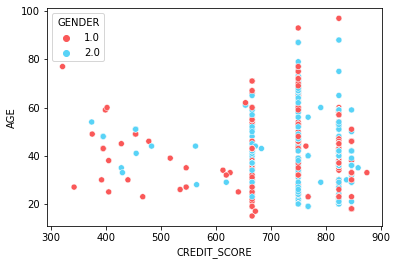

In [14]:
# How about age, Gender and credit_score?
import seaborn as sns 
pal=['#FA5858', '#58D3F7']
sns.scatterplot(x='CREDIT_SCORE', y='AGE', data=drivers_df, palette=pal, hue='GENDER')
     
